In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import numpy as np

In [2]:
start = '2012-01-01'
end = '2022-12-30'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [4]:
data.reset_index(inplace=True)

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [7]:
ma_100_days = data.Close.rolling(100).mean()

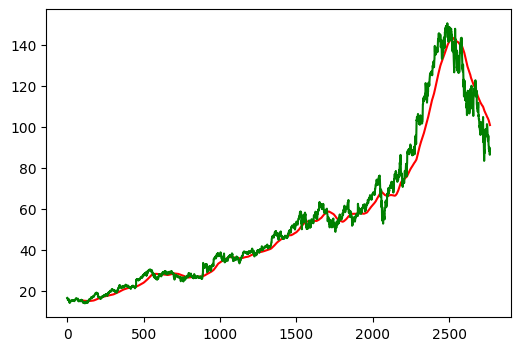

In [8]:
plt.figure(figsize=(6,4))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
ma_200_days = data.Close.rolling(200).mean()

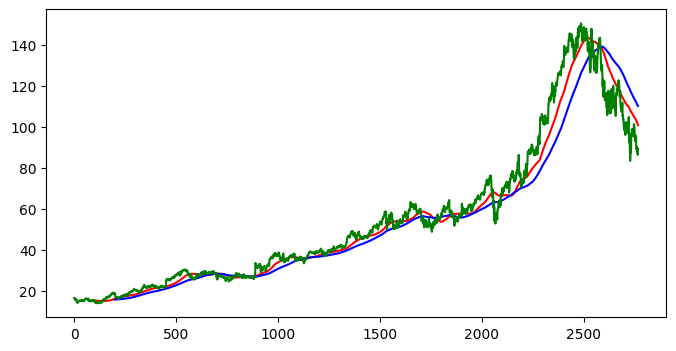

In [10]:
plt.figure(figsize=(8,4))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [11]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.8)])
dat_test = pd.DataFrame(data.Close[int(len(data)*0.8): int(len(data))])

In [13]:
data_train.shape

(2213, 1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
dat_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100,dat_train_scale.shape[0]):
    x.append(dat_train_scale[i-100:i])
    y.append(dat_train_scale[i,0])

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
x,y = np.array(x), np.array(y)

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu',return_sequences= True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [20]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.fit(x,y,epochs=40,batch_size=32,verbose=1)

Epoch 1/40
67/67 [==============================] - 64s 779ms/step - loss: 0.0274
Epoch 2/40
67/67 [==============================] - 47s 708ms/step - loss: 0.0065
Epoch 3/40
67/67 [==============================] - 83s 1s/step - loss: 0.0057
Epoch 4/40
67/67 [==============================] - 45s 673ms/step - loss: 0.0093
Epoch 5/40
67/67 [==============================] - 51s 767ms/step - loss: 0.0061
Epoch 6/40
67/67 [==============================] - 49s 734ms/step - loss: 0.0049
Epoch 7/40
67/67 [==============================] - 45s 663ms/step - loss: 0.0046
Epoch 8/40
67/67 [==============================] - 51s 760ms/step - loss: 0.0040
Epoch 9/40
67/67 [==============================] - 52s 780ms/step - loss: 0.0040
Epoch 10/40
67/67 [==============================] - 44s 657ms/step - loss: 0.0039
Epoch 11/40
67/67 [==============================] - 39s 576ms/step - loss: 0.0037
Epoch 12/40
67/67 [==============================] - 41s 604ms/step - loss: 0.0036
Epoch 13/40
67/6

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [24]:
past_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([past_100_days, dat_test],ignore_index=True)

In [28]:
data_test_scale = scaler.fit_transform(data_test)

In [30]:
x= []
y =[]

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [31]:
y_predict = model.predict(x)

18/18 [==============================] - 22s 529ms/step


In [34]:
scale = 1/scaler.scale_

In [35]:
y_predict = y_predict*scale

In [36]:
y=y*scale

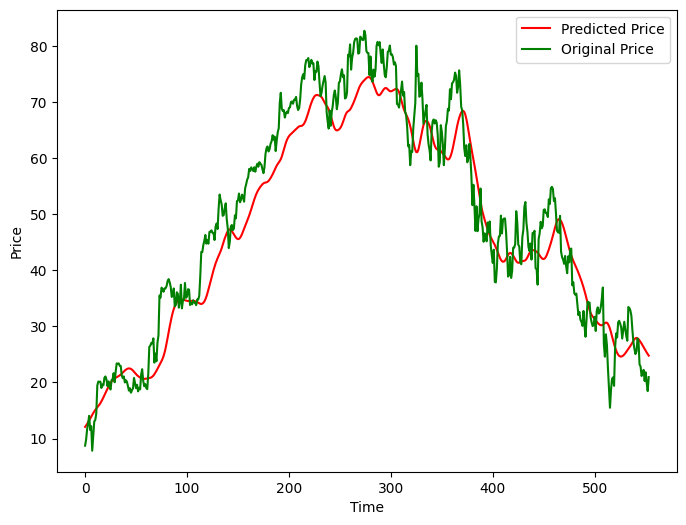

In [39]:
plt.figure(figsize=(8,6))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [40]:
model.save('stock_prediction_model.keras')